# Programação I (LTI)

## Capítulo - Dicionários, Conjuntos e Geradores

2020/21 -- João Pedro Neto, DI/FCUL

Neste capítulo vamos introduzir mais dois tipos estruturados: os dicionários e os conjuntos. Cada um foca numa forma comum de organizar informação e podem ser usados, como as listas e os tuplos, para facilitar a construção de programas.

### Dicionários

O tipo Python `dict`, designado por **dicionário**, tem as seguintes características:

+ É um tipo mutável (como as listas)

+ É um tipo onde não existe uma ordem dos seus valores (ao contrário das listas)

+ Guarda sempre pares (*chave*, *valor*) não havendo restrições aos tipos dos valores

+ São indexados pela chave e não por um índice inteiro (como era o caso nas listas e tuplos)

+ As chaves têm de ser valores de tipo imutáveis

Para criar dicionários o Python tem uma sintaxe própria e um conjunto de comandos que podemos ver nos seguintes exemplos:

In [ ]:
dicionarioVazio = { }

registo = { 'nome'  : 'João', 
            'id'    : 12345, 
            'eProf' : True }

print( registo['nome'] ) # aceder a valor associado à chave 'nome'

print('-'*20)            
print("Existem {0} pares no registo".format(len(registo)))  
print("As chaves do registo são: " , registo.keys() )  
print("Os valores do registo são: ", registo.values() )
print("Os pares do registo são: "  , registo.items() )  
print("A chave 'nome' existe no registo? ", 'nome' in registo )  

print('-'*20)            
for chave in registo:
  print(chave, ':', registo[chave])

print('-'*20)            
type(registo)

João
--------------------
Existem 3 pares no registo
As chaves do registo são:  dict_keys(['nome', 'id', 'eProf'])
Os valores do registo são:  dict_values(['João', 12345, True])
Os pares do registo são:  dict_items([('nome', 'João'), ('id', 12345), ('eProf', True)])
A chave 'nome' existe no registo?  True
--------------------
nome : João
id : 12345
eProf : True
--------------------


dict

O Python permite a construção de dicionários por compreensão:

In [ ]:
quadrados = { x : x**2 for x in range(6) }
print(quadrados)

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25}


In [ ]:
def histogramaLetras(frase):
  return { c : '=' * frase.count(c) for c in frase }

histogramaLetras("vamos fazer um histograma das varias letras desta frase")  

Sendo mutável podemos manipular o conteúdo de um dicionário,

In [ ]:
quadrados[6] = 35   # inserir novos pares
print(quadrados)

del quadrados[0]    # apagar um par
print(quadrados)

quadrados[1] = 2    # alterar o valor de uma chave existente
print(quadrados)

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 35}
{1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 35}
{1: 2, 2: 4, 3: 9, 4: 16, 5: 25, 6: 35}


É possível juntar dois dicionários

In [ ]:
quadrados2 = { x : x**2 for x in range(6, 10) }

quadrados.update(quadrados2)
print(quadrados)

{1: 2, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36, 7: 49, 8: 64, 9: 81}


Para criar uma cópia de um dicionário usar a função `copy`, desta forma manipular um dos dicionários não irá afetar o outro:

In [ ]:
quadrados = { x : x**2 for x in range(3) }

copiaQuadrados = quadrados.copy()
copiaQuadrados[1] = 0

print(quadrados)
print(copiaQuadrados)

{0: 0, 1: 1, 2: 4}
{0: 0, 1: 0, 2: 4}




---



Podemos usar dicionários para organizar informação complexa. 

Por exemplo, se tivermos uma lista de pares com nomes de filmes e anos de produção, podemos usar um dicionário para indexar os filmes por ano:

In [ ]:
baseDadosFilmes = [
   ("Blade Runner 2049", 2017),
   ("Logan", 2017),
   ("A Quiet Place", 2018),
   ("The Wind", 2018),
   ("Hereditary", 2018),
   ("Joker", 2019),
   ("Parasite", 2019),
   ("Arctic", 2019),
   ("Invisible Man", 2020)
  ]

filmesPorAno = {}

for nome,ano in baseDadosFilmes:
  if ano not in filmesPorAno:
    filmesPorAno[ano] = [nome]
  else:
    filmesPorAno[ano] = filmesPorAno[ano] + [nome]

for ano in filmesPorAno:
  print(ano, ':', filmesPorAno[ano])  

2017 : ['Blade Runner 2049', 'Logan']
2018 : ['A Quiet Place', 'The Wind', 'Hereditary']
2019 : ['Joker', 'Parasite', 'Arctic']
2020 : ['Invisible Man']


A função `get(chave, default)` devolve o valor associado à chave, ou devolve o valor default se a chave não existir. Esta função permite simplificar o ciclo anterior:

In [ ]:
filmesPorAno = {}

for nome,ano in baseDadosFilmes:
  filmesPorAno[ano] = filmesPorAno.get(ano, []) + [nome]

for ano in filmesPorAno:
  print(ano, ':', filmesPorAno[ano])  

2017 : ['Blade Runner 2049', 'Logan']
2018 : ['A Quiet Place', 'The Wind', 'Hereditary']
2019 : ['Joker', 'Parasite', 'Arctic']
2020 : ['Invisible Man']




---



Podemos utilizar dicionários para guardar informação que é indexada a tuplos de $n$ componentes. Um exemplo são as [matrizes esparsas](https://en.wikipedia.org/wiki/Sparse_matrix), matrizes muito grandes que possuem poucos valores diferentes de zero. Talvez o 
exemplo mais famoso sejam as folhas Excel.

In [ ]:
folhaExcel = {}

folhaExcel[('B',3)] = 10
folhaExcel[('B',4)] = 90
folhaExcel[('B',5)] = '=SOMA(B3:B4)'

try:
   print(folhaExcel[('B',6)]) 
except KeyError:      # exceção se a chave não existir
   print(0)

# ou...

print( folhaExcel.get(('B',6), 0) ) 



---

### Conjuntos


O tipo `set`, designado por **conjunto**, tem as seguintes características:

+ Não existe uma ordem dos elementos, nem uma indexação

+ Os conjuntos não admitem repetições. Cada valor do conjunto é, por definição, único

+ São objetos mutáveis, as operações sobre conjuntos alteram o próprio conjunto

+ Porém, os valores guardados num conjunto têm de ser imutáveis! Não podemos ter, por exemplo, conjuntos de conjuntos

Vejamos como definir conjuntos e algumas das operações que podemos usar:

In [ ]:
conjuntoVazio = set()  # { } já está reservado para os dicionários...

conjunto1 = { 1, 2, 3, 4 }
conjunto2 = { 1, 3, 5, 6, 7 }

print("1 pertence a", conjunto1, "? ", 1 in conjunto1)
print('-'*30)
print("União            =", conjunto1 | conjunto2 )
print("Intersecção      =", conjunto1 & conjunto2 )
print("Diferença        =", conjunto1 - conjunto2 )
print("Ou num ou noutro =", conjunto1 ^ conjunto2 )
print('-'*30)
print(conjunto1, "está contido em", conjunto2, "? ", conjunto1 < conjunto2)

1 pertence a {1, 2, 3, 4} ?  True
------------------------------
União            = {1, 2, 3, 4, 5, 6, 7}
Intersecção      = {1, 3}
Diferença        = {2, 4}
Ou num ou noutro = {2, 4, 5, 6, 7}
------------------------------
{1, 2, 3, 4} está contido em {1, 3, 5, 6, 7} ?  False


O tipo `set` também tem funções que modificam o seu valor, como `intersect`, `union`, `add`, `update`, `remove`, `copy`. Podem conferir a lista completa na [documentação](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset) da linguagem.

Também é possível ter conjuntos por compreensão:

In [ ]:
{ x for x in 'abracadabra' if x not in 'bc' }

{'a', 'd', 'r'}

Como nos vamos habituando, o Python dá-nos muita liberdade para interagir com os diferentes tipos:

In [ ]:
conjunto = set( range(10) )
print(conjunto)

conjunto = set( 'abracadabra' )
print(conjunto)

conjunto = set( ('João', 1.72, 41123, True) )
print(conjunto)

conjunto = { string for string in ['abc', 'def', 'abc'] }
print(conjunto)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{'r', 'd', 'b', 'c', 'a'}
{'João', 1.72, 41123, True}
{'def', 'abc'}


Os conjuntos são úteis no caso em que queremos remover os duplicados de uma lista. Como? Convertendo a lista para um conjunto, os duplicados são removidos. Depois é só reconverter para lista:

In [ ]:
lista = [4,3,2,6,5,2,3,1,3]

print(set(lista))

print( list(set(lista)) )

{1, 2, 3, 4, 5, 6}
[1, 2, 3, 4, 5, 6]


Podemos usar conjuntos para descobrir diferenças entre duas *strings*:

In [ ]:
set('abcdefg') - set('abdghij')

{'c', 'e', 'f'}

Ou calcular a igualdade de tipos estruturados quando a ordem dos elementos não interessa:

In [ ]:
lista1 = [1,2,3,4,5]
lista2 = [5,4,3,2,1]

set(lista1) == set(lista2)

A restrição dos conjuntos a armazenar valores imutáveis impede que possamos ter conjuntos de listas. O Python possui um outro tipo de conjunto designado por `frozenset` que força todos os seus valores a serem imutáveis. Não iremos usar este tipo, mas quem tiver curiosidade pode consultar a [documentação](https://docs.python.org/3/library/stdtypes.html#set-types-set-frozenset) da linguagem.



---

### Interlúdio

Antes de continuar, e tendo a experiência das últimas semanas, vamos falar mais um pouco sobre as funções Python.

Como sabem, uma função define-se com a palavra reservada `def`,


In [ ]:
def dobro(x):
  return 2*x

Quando o Python está a correr o vosso programa e chega a um `def`, ele vai executar esse código. A palavra `def` é apenas um elemento sintático que diz ao Python que queremos definir uma nova variável do tipo `function` a qual deve ficar associada aos comandos que se seguem. Ou seja, é criado um valor do tipo `function` que é referenciado pela variável do nome da função.

In [ ]:
a = dobro(100)

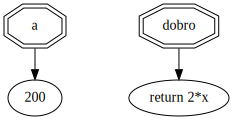

In [ ]:
#@title 
from graphviz import Digraph

styles = {
    'ref': {'shape': 'doubleoctagon'},
    'val': {'shape': 'ellipse'}
}

g = Digraph(engine="neato")
g.node('V', 'a',  styles['ref'], pos='0,2!')
g.node('Vv', '200', styles['val'], pos='0,1!')
g.edge('V', 'Vv')

g.node('F', 'dobro',  styles['ref'], pos='2,2!')
g.node('Fv', 'return 2*x', styles['val'], pos='2,1!')
g.edge('F', 'Fv')

g


Se o que estamos a fazer é definir uma nova variável porque é que existe uma sintaxe diferente para o tipo função? 

Bem, os elementos sintáticos de uma linguagem de programação derivam de decisões dos seus arquitetos, e normalmente têm a ver com razões práticas e por vezes históricas (porque as linguagens são baseadas em linguagens mais antigas).

No caso das funções, estas podem ter múltiplos comandos e era necessário encontrar um formato simples que ajudasse os programadores a escreverem os seus programas.

Mas existe uma sintaxe alternativa, mais parecida com a definição das outras variáveis, para definir funções simples que *tenham apenas um comando*. Esse formato é conhecido por **expressões lambda** (este nome estranho tem a ver com a pré-História da Informática) e escreve-se assim:

In [ ]:
triplo = lambda x : 3*x
a = triplo(100)
print(a)

soma = lambda a,b : a+b
print(soma(10,20))

Reparem que uma expressão lambda, como o nome indica, é uma expressão. Elas podem ser usadas no meio de uma expressão maior, desde que a expressão faça sentido.

In [ ]:
valor = -5
(lambda x : x > 0)( valor )

Podemos usá-las em qualquer local. No seguinte exemplo criamos uma lista de funções potência:

In [ ]:
listaFuncoes = [ lambda x : x**2, lambda x : x**3, lambda x : x**4 ]

for f in listaFuncoes:
  print(f(3))

Um exemplo com dicionários:

In [ ]:
potencias = { 'quadrado' : lambda x : x**2,  # associa a cada string uma função
              'cubo'     : lambda x : x**3, 
              'quarta'   : lambda x : x**4
            }

# potencias['cubo'] devolve o valor que é a função cubo
print( potencias['cubo'](10) )

Normalmente só se usam expressões lambda quando precisamos de uma função simples uma única vez, não valendo a pena estar a escrever a definição tradicional.


---

### Iteráveis

Em Python, qualquer valor que possa ser usado num ciclo for é um **iterável** (em inglês, *iterable*).

Entre todos os valores possíveis que são iteráveis, as **sequências** são iteráveis que podem ser indexados. Já conhecemos vários tipos cujos valores são sequências: as listas, os tuplos e as *strings*.

In [ ]:
for i in [1,2,3]:
  print(i, end=' ')

print()

for i in (True, 3.1, 'x'):
  print(i, end=' ')  

print()

for i in "abc":
  print(i, end=' ')  

Há outros tipos do Python cujos valores não são sequências mas são iteráveis: conjuntos, dicionários e ficheiros. Podemos usá-los nos ciclos for mas não podemos indexá-los.

In [ ]:
for i in {1,2,3}:
  print(i, end=' ')

print()

for i in {'a':1, 'b':2}:
  print(i, end= ' ')

A forma como os ciclos for funcionam nos bastidores é através de uma função designada `iter`, que recebe um valor iterável e devolve um **iterador** sobre os seus dados.

In [ ]:
iter([1,2,3])

A forma de ir buscar informação ao iterador é usando a função `next` que devolve os valores, um a um,

In [ ]:
iterador = iter([1,2,3])
print(next(iterador))
print(next(iterador))
print(next(iterador))

Quando chegamos ao fim dos valores, se insistirmos, produzimos uma excepção:

In [ ]:
print(next(iterador))

Uma vez esgotado, o iterador não serve para mais nada. Isto funciona da mesma forma para qualquer iterável.

Se quiséssemos traduzir o seguinte ciclo for,

In [ ]:
for i in [1,2,3]:
  print(i, end=' ')

para um ciclo while, este ficaria o seguinte aspeto:

In [ ]:
iterador = iter([1,2,3]) # criar um iterador sobre listas
fimCiclo = False
while not fimCiclo:
  try:
    i = next(iterador)
  except StopIteration:
    fimCiclo = True
  else:  # executa se a exceção não ocorreu
    print(i, end=' ')

Claro que preferimos usar o ciclo for nestes casos, porque torna o código muito mais simples. Mas na verdade, o Python, cada vez que encontra um ciclo for vai traduzi-lo para um ciclo while desta forma.

Nós até já temos trabalhado com outros iteradores sem saber. Por exemplo, as funções `enumerate` e `zip` também devolvem iteradores. É por isso que as podemos usar nos ciclos for.

Dito isto, vamos apresentar uma nova forma de iterável que irá expandir as nossas possibilidades de programar em Python.

---

### Geradores

O comando `return` termina a execução da função e devolve o valor da expressão que se lhe segue para quem invocou a função. Quando a função é novamente invocada, voltamos ao início da função e repetimos tudo outra vez.

Mas existe uma outra possibilidade que ainda não falámos. E se fosse possível devolver o valor como no `return` mas sem esquecer onde estávamos? Ou seja, quando se invocasse a função novamente, em vez de recomeçar no início, continuaríamos no local onde saímos da última vez.

Podemos fazer isso usando o comando `yield` em vez do `return`:

In [ ]:
def g(x):
  yield x * 2
  yield x * 3
  yield x * 4

print([ a for a in g(2)])
print([ a for a in g(100)])

`g` continua a ser uma função,

In [ ]:
type(g)

mas quando associamos um valor a `g`, `g(x)` é um **gerador** de valores baseados em nesse valor,

In [ ]:
type(g(2))

Quando criamos um gerador podemos ter acesso aos seus elementos, um a um, de cada vez. Para ir buscar os elementos individualmente pode-se usar a função `next`.

In [ ]:
gen = g(2)
print( next(gen) )
print( next(gen) )
print( next(gen) )

Se o gerador terminar e insistirmos em invocar o `next`, o Python produz um erro de execução lançando a exceção `StopIteration`.

In [ ]:
print( next(gen) )

Os geradores costumam estar associados a listas por compreensão ou a ciclos `for`, que invocam o `next` nos bastidores:

In [ ]:
print([ a for a in g(2)])

for valor in g(2):
  print(valor, end= " ")

Para criar geradores mais interessantes podemos gerar os seus valores através de ciclos:

In [ ]:
def potencias2(n):
  for i in range(n):
    yield 2**i

for valor in potencias2(20):
  print(valor, end= " ")  

Mas nós já podíamos fazer isto com listas de compreensão normais:

In [ ]:
def potencias2(n):
  return [ 2**i for i in range(n) ]

for valor in potencias2(20):
  print(valor, end= " ")  

O que se ganhou com esta abordagem dos geradores?

Na segunda versão, com a lista por compreensão, foi preciso calcular a lista de potências inteira antes de devolver o primeiro resultado! Na versão do gerador, cada valor é calculado apenas quando é preciso!! A grande vantagem é pouparmos computação e memória (lembram-se do elogio à preguiça?)

Vinte valores deste exemplo não parece nada de especial, mas se a lista fosse composta por milhões de valores, iríamos poupar muita memória...

Mas há outros ganhos interessantes. Podemos ter geradores infinitos! 🤔 Ou seja, geradores que nunca terminam de gerar valores.	🤯 A Matemática tem montes de exemplos onde podemos aplicar esta ideia: o conjunto dos naturais, o conjunto dos números primos, uma progressão aritmética, a sequência de Fibonacci...

Já que falamos dela, vamos criar um gerador para a sequência de Fibonacci

In [ ]:
def fibonacci():
  a = 1
  b = 1
  while True:   # ciclo infinito!
    yield a
    a,b = b,a+b

fibs = fibonacci()
for i in range(25):
  print(next(fibs), end= " ")
print('...')  

E podemos ter diferentes gerações ao mesmo tempo, sem que haja interferência!

In [ ]:
fibs1 = fibonacci()
fibs2 = fibonacci()

print(next(fibs1), next(fibs1), next(fibs1), next(fibs1))
print(next(fibs2), next(fibs2), next(fibs2))



---



Se tentarmos converter um gerador num tuplo ou lista, o Python vai gerar todos os valores para realizar a conversão:

In [ ]:
def potencias2(n):
  for i in range(n):
    yield 2**i

print(  list(potencias2(10)) )
print( tuple(potencias2(10)) )

# criar um dicionário com um gerador
{ num : pot for (num,pot) in enumerate(potencias2(10))}

Um aviso: não façam isto para um gerador infinito! A coisa não vai correr bem...

Se quisermos definir geradores recursivamente temos de ter algum cuidado. Seja o seguinte gerador recursivo para gerar os números fatoriais:

In [ ]:
def factoriais(n=0, value=1):
  yield value
  factoriais(n+1, value*(n+1))

facs = factoriais()
print(next(facs))  # gera o 0! ...
print(next(facs))  # ... mas depois falha

O Python não é esperto o suficiente para perceber sozinho que era para continuar a gerar valores após a invocação recursiva. Ele interpreta que depois de gerar o `1` não há mais valores a gerar. 

Para o convencer a continuar na invocação recursiva temos de a prefixar com `yield from`:

In [20]:
def factoriais(n=0, value=1):
  yield value
  yield from factoriais(n+1, value*(n+1))

facs = factoriais()
for f in range(10):
  print(next(facs), end= " ")

1 1 2 6 24 120 720 5040 40320 362880 

O significado de `yield from` é de passar a responsabilidade de gerar valores para a função seguinte. Neste caso, a função é a mesma (não precisa de ser), criando assim um gerador recursivo.

### Expressões Geradoras

O Python permite igualmente criar geradores por compreensão, mais um tipo para juntar à coleção,

In [ ]:
lista      = [   x**2 for x in range(10) ]

dicionario = { x:x**2 for x in range(10) }

conjunto   = {   x**2 for x in range(10) }

gerador    = (   x**2 for x in range(10) )

Vamos imprimir os seus valores,

In [ ]:
print(lista)
print(dicionario)
print(conjunto)
print(gerador)

Hmmm... o que aconteceu com a expressão gerador? 

Neste caso, o valor devolvido é um gerador que tem de ser ativado (por exemplo, com a função `next`) para podermos ver os seus valores,

In [ ]:
print(next(gerador))
print(next(gerador))

Se colocarmos agora o gerador num ciclo, ele não recomeça no zero, mas continua no seu estado atual,

In [ ]:
for i in gerador:
  print(i, end=' ')

Quando o gerador termina, se tentar buscar mais alguma coisa, não tenho sorte...

In [ ]:
print(next(gerador))

Isto pode produzir respostas inesperadas:

In [ ]:
gerador = (x**2 for x in range(10) )

print(9 in gerador)
print(9 in gerador)

True
False


A segunda expressão dá falso porque o gerador já tinha passado pelo nove, e não há mais noves no resto dos elementos gerados.

In [ ]:
gerador = (x**2 for x in range(10) )

print(9 in gerador)

list(gerador)

True


[16, 25, 36, 49, 64, 81]

As expressões geradores são úteis quando queremos usar um gerador uma única vez, escusando de criar uma função geradora como fizemos nos exemplos iniciais.

Os geradores, porque permitem poupar muita memória ao não calcularem de imediato todos os seus elementos, têm limitações que as listas por compreensão não têm. Por exemplo, não são indexáveis nem posso usar o `len` para calcular o seu número de elementos.

In [ ]:
gerador = ( x**2 for x in range(10) )

gerador[1]

Como em qualquer outra técnica, há vantagens e desvantagens no uso de geradores. É a responsabilidade do programador saber escolher a opção adequada ao problema que pretende resolver.



---

### Aplicação: Cálculo Combinatório

No Secundário um dos temas das aulas de Matemática foi o cálculo combinatório onde introduziram várias estratégias de contagem, como as permutações. Estas estratégias também são importantes na programação. Há muitas situações onde queremos saber quantas variantes há de uma certa informação, ou mesmo saber a lista dessas variações.

Uma dessas estratégias designa-se por **arranjos**. No caso dos arranjos queremos saber as variantes possíveis de um conjunto de valores, onde os valores podem repetir-se e a ordem como os valores se dispõem é importante. Se tivermos $n$ valores e $p$ posições haverá $n^p$ variantes.

Por exemplo, para os valores `1,2,3` e considerando duas posições, os arranjos possíveis são `11,12,13,21,22,23,31,32,33`.

A seguinte função Python recebe uma lista de valores e o valor $p$ e produz uma lista com todos os arranjos possíveis.

In [ ]:
def arranjos(xs, p, pos=0):
  if p == pos:
    return [[]]  # demos valores a todas as posições, não há mais soluções aqui
  
  return [ [x]+ys for x  in xs
                  for ys in arranjos(xs, p, pos+1)]

arranjos([1,2,3],2 )                  

[[1, 1], [1, 2], [1, 3], [2, 1], [2, 2], [2, 3], [3, 1], [3, 2], [3, 3]]

A ideia da função é produzir, para cada posição `i` da solução, todos os valores possíveis `x` de `xs`. A função está definida recursivamente. Juntamos o `x` à resposta do subproblema que é criar os arranjos para o resto da solução. O valor do parâmetro `pos` diz-nos onde estamos. Quando `pos` é igual a `p`, chegámos à base da recursão (não há mais posições para preencher), e temos de voltar para trás para experimentar outras variantes.

Vamos definir uma função que imprime os resultados de forma mais simpática:

In [ ]:
# função para imprimir as soluções
def mostrar(solucoes, porLinha=10):
  for (i,solucao) in enumerate(solucoes):
    for c in solucao:
      print(c, end= "")
    if (i%porLinha == porLinha-1):  # imprimir n soluções por linha
      print('\n')
    else:
      print(end= " ")

mostrar( arranjos([1,2,3],2) )

11 12 13 21 22 23 31 32 33 

E vejamos um outro exemplo:

In [ ]:
bolas = ["🔴", "🟡", "🔵", "🟢"]

In [ ]:
solucoes = arranjos(bolas, 2)
mostrar(solucoes)

In [ ]:
solucoes = arranjos(bolas[2:4], 4)
mostrar(solucoes)

In [ ]:
solucoes = arranjos(bolas, 3)
mostrar(solucoes)

O número de arranjos cresce muito rapidamente com $n$ e $p$. Para evitar ter as variantes todas numa lista, podemos criar um gerador:

In [ ]:
def gArranjos(xs, p, pos=0, sol=[]):
  if p == pos:  # base da recursão:
    yield sol   #  devolver a solução atual
    xs = []     #  impede a execução do ciclo seguinte, terminando a invocação

  for x in xs:
    yield from gArranjos(xs, p, pos+1, [x]+sol)

O gerador usa um parâmetro extra `sol` onde a lista com a solução atual vai sendo construída. Para cada incremento de `p` junta-se mais um valor à lista `sol`.

Se compararem com a função recursiva tradicional, esta parece menos complicada. A primeira solução tem de usar a lista de compreensão porque precisa ir guardando todas as soluções encontradas até aqui. Isto porque é suposto devolver a lista com todas as soluções quando terminar.

O gerador não tem esse problema. O Python simplesmente continua a executá-lo a partir do último `yield`. Não precisamos guardar listas de soluções.

Observem o seu funcionamento,

In [ ]:
n = 4  # 4 bolas
p = 2  # 2 posições
solucoes = gArranjos(bolas, p)

for _ in range(n**p):
  solucao = next(solucoes)  # gerar soluções, uma a uma
  for c in solucao:
    print(c, end= "")
  print(end= "  ")



---



Podemos agora implementar as **permutações**. Nas permutações não há elementos repetidos mas a ordem continua a ser importante. Permutar um conjunto de $n$ elementos, produz $n!$ variantes.

In [ ]:
def permutacoes(xs):
  if len(xs) == 0:
    return [[]]

  return [ [xs[i]]+ys for i  in range(len(xs)) 
                      for ys in permutacoes(xs[0:i]+xs[i+1:])]

A implementação da função segue um raciocínio similar à função `arranjos`. A maior diferença é que a cada invocação retiramos o elemento escolhido `xs[i]` para calcular a solução do subproblema (já que não pode haver elementos repetidos). O retirar do i-ésimo elemento `xs` faz-se na expressão `xs[0:i]+xs[i+1:]`.

In [ ]:
# as permutações as primeiras três bolas
solucoes = permutacoes(bolas[:3])
mostrar(solucoes)

In [ ]:
# as permutações de todas as bolas
solucoes = permutacoes(bolas)
mostrar(solucoes)

A versão em gerador usa novamente o parâmetro extra `sol` para construir a solução atual:

In [ ]:
def gPermutacoes(xs, sol=[]):
  if len(xs) == 0:
    yield sol
      
  for i in range(len(xs)):
    yield from gPermutacoes(xs[0:i]+xs[i+1:], sol+[xs[i]])

In [ ]:
solucoes = gPermutacoes(bolas[:3])

for _ in range(6): #3! é 6
  solucao = next(solucoes)  # gerar soluções, uma a uma
  for c in solucao:
      print(c, end= "")
  print(end= "  ")



---



Vamos ver agora as **combinações**. Nas combinações não pode haver repetidos como nas permutações, mas agora a ordem é irrelevante. O número de combinações escolhendo $p$ elementos de um total de $n$ é $$\frac{n!}{p!(n-p)!}$$

In [ ]:
def combinacoes(xs, p):
  if p == 0:
    return [[]]
  
  return [ [xs[i]]+ys for i in range(len(xs)) 
                      for ys in combinacoes(xs[i+1:], p-1)] 

Cada vez que escolhemos um elemento, já só vamos calcular o subproblema com os elementos que estão listados a seguir. Desta forma, prevenimos as repetições de elementos e prevenimos também ordens diferentes dos mesmos elementos.

In [ ]:
solucoes = combinacoes(bolas, 2)
mostrar(solucoes)

In [ ]:
solucoes = combinacoes(bolas, 3)
mostrar(solucoes)

In [ ]:
solucoes = combinacoes(bolas, 4)
mostrar(solucoes)

Segue-se a versão gerador usando a mesma estrutura dos geradores anteriores:

In [9]:
def gCombinacoes(xs, p, sol=[]):
  if p == 0:    # base da recursão:
    yield sol   #  devolver a solução atual
    xs = []     #  impede a execução do ciclo, terminando esta invocação

  for i in range(len(xs)):
    yield from gCombinacoes(xs[i+1:], p-1, sol+[xs[i]])

In [ ]:
solucoes = gCombinacoes(bolas, 3)

for _ in range(4):
  solucao = next(solucoes)  # gerar soluções, uma a uma
  for c in solucao:
      print(c, end= "")
  print(end= "  ")



---



Claro que podemos usar estas funções de cálculo combinatorial para variados tipos de informação estruturada:

In [ ]:
mostrar( arranjos((1,'x',2), 3), 15 )

In [ ]:
mostrar( permutacoes([1,2,3,4,5]), 20 )

In [ ]:
mostrar( combinacoes("abcdefg", 5), 12 )

In [ ]:
mostrar( permutacoes(['🦊','🐱','🦁','🐶']), 8 )



---

### Exercícios

<font size="+4" color="blue;green"><b>?</b></font> Crie um dicionário que representa um stock de uma loja. Este stock é constituído por registos de produtos. Cada produto é identificado por um código numérico ao qual está associado: (a) um nome, (b) o custo por unidade, (c) quantas unidades existem no stock

Considere que a loja tem quatro produtos, alperces, bananas, cerejas e dióspiros. Os respetivos custos são 12.0, 5.5, 15.7 e 20.0. As respetivas quantidades são 700, 500, 350, 50.

Defina também a função `imprimirStock` que mostra o stock na seguinte forma tabular

    |  Produto   |  Custo  | Stock |
    +------------+---------+-------+
    | alperce    |   12.0€ |   700 |
    | banana     |    5.5€ |   500 |
    | cereja     |   15.7€ |   350 |
    | diospiro   |   20.0€ |    50 |
    +------------+---------+-------+

In [ ]:
stock = {  }   # ponham aqui a vossa solução



---



<font size="+4" color="blue;green"><b>?</b></font> Defina a função `atualizarStock` que recebe um stock e uma lista de pares `(id, quantidade)` que define uma compra. A função deve atualizar o stock descontando as quantidades referidas na compra dada. 

Assuma que a compra não tem quantidades maiores que as disponíveis no stock.



In [ ]:
def atualizarStock(stock, compra):
  pass # ponham aqui a vossa solução

compra = [(1,100), (2,50), (1,25)]  
atualizarStock(stock, compra)
imprimirStock(stock)



---



<font size="+4" color="blue;green"><b>?</b></font> Defina um predicado `compraValida` que valida se uma compra é válida para um stock, ie, se atualizássemos o stock, não haveria valores negativos. Para além disso, o predicado deve validar se todas as chaves correspondem a produtos, e se as quantidades não são negativas.

Use esta função para definir o contrato de `atualizarStock`.

In [ ]:
def compraValida (stock, compra):
  pass # ponham aqui a vossa solução



---



<font size="+4" color="blue;green"><b>?</b></font> Defina um dicionário que indique as quantidades de moedas e notas (até 50€) de uma caixa de supermercado. Escolha valores exemplo para as moedas e notas.

O primeiro passo a decidir é como representar as moedas e notas nas chaves do dicionário.

In [ ]:
caixa = {  }   # ponham aqui a vossa solução



---



<font size="+4" color="blue;green"><b>?</b></font> Defina uma função `valorEmCaixa` que recebe um valor dicionário do tipo acima, e devolve o valor total do dinheiro que está na caixa em cêntimos.

In [ ]:
def valorEmCaixa(caixa):
  pass # ponham aqui a vossa solução



---



<font size="+4" color="blue;green"><b>?</b></font> Defina a função `calcularTroco` que recebe uma caixa, o custo de uma compra e a quantia entregue, e calcule o troco que tem de ser devolvido. Este troco deve ser representado por um dicionário com o mesmo tipo de chaves usado na caixa.

Para além disso, deve minimizar o número de notas/moedas que compõem o troco.

Pode assumir que a caixa tem dinheiro suficiente para dar o troco certo.



In [ ]:
def calcularTroco(caixa, custo, entregue):
  pass # ponham aqui a vossa solução

calcularTroco(caixa, 1503, 2010) # eg: o cliente deu 20.10€ para pagar 15.03€  



---



<font size="+4" color="blue;green"><b>?</b></font> Defina a função `separarPorTamanho` que recebe uma *string* e devolve um dicionário que organiza as palavras da *string* por tamanho, sendo as chaves esses tamanhos.

Não inclua repetições e guarde apenas palavras com duas ou mais letras. Exclua também a pontuação e não distinga palavras maiúsculas e minúsculas.

Sugestão: a função `string.lower()` permite converter maíusculas em minúsculas.


In [ ]:
import re
def separarPorTamanho(text):
  lista = [p for p in re.split("[ ,.!?]", textoBase.lower()) if len(p) >= 2]

  dic = {}
  for p in lista:
    c = len(p)
    if c not in dic:
      dic[c] = [p]
    elif p not in dic[c]:
      dic[c].append(p)
  return dic
textoBase = "Mostly, when you see programmers, they aren't doing anything. One of the attractive things about programmers is that you cannot tell whether or not they are working simply by looking at them.  Very often they're sitting there seemingly drinking coffee and gossiping, or just staring into space.  What the programmer is trying to do is get a handle on all the individual and unrelated ideas that are scampering around in his head. Charles M. Strauss"
separarPorTamanho(textoBase)

{2: ['of', 'is', 'or', 'by', 'at', 'to', 'do', 'on', 'in'],
 3: ['you', 'see', 'one', 'the', 'not', 'are', 'and', 'get', 'all', 'his'],
 4: ['when',
  'they',
  'that',
  'tell',
  'them',
  'very',
  'just',
  'into',
  'what',
  'head'],
 5: ['doing', 'about', 'often', 'there', 'space', 'ideas'],
 6: ['mostly',
  "aren't",
  'things',
  'cannot',
  'simply',
  'coffee',
  'trying',
  'handle',
  'around'],
 7: ['whether',
  'working',
  'looking',
  "they're",
  'sitting',
  'staring',
  'charles',
  'strauss'],
 8: ['anything', 'drinking'],
 9: ['seemingly', 'gossiping', 'unrelated'],
 10: ['attractive', 'programmer', 'individual', 'scampering'],
 11: ['programmers']}



---



<font size="+4" color="blue;green"><b>?</b></font> Considere os  conjuntos definidos na caixa seguinte.

Responda a estas perguntas com as operações disponíveis para conjuntos:

+ É a Ana uma engenheira?

+ Quem é professor e engenheiro?

+ Todas as pessoas em qualquer das categorias

+ Engenheiros que não são professores

+ Professores que não são engenheiros

+ São todos os professores, engenheiros?

+ Quem é ou professor ou engenheiro?



In [ ]:
professores = { 'ana', 'bruno', 'dulce', 'rui', 'sandra', 'zé' }
engenheiros = { 'ana', 'diogo', 'sofia' }




---



<font size="+4" color="blue;green"><b>?</b></font> Defina a função `conjuntoAnagramas` que recebe uma lista de *strings* e devolve um dicionário com chaves *string*. O valor associado a cada chave é o conjunto das palavras da lista inicial que são anagramas dessa chave.

Esta lista exemplo deverá devolver o seguinte dicionário:

     >>> palavras = ['amor', 'roma', 'lista', 'armo', 'tisla', "1x2"]  
     >>> conjuntoAnagramas(palavras)
     {'1x2': {'1x2'}, 'amor': {'amor', 'armo', 'roma'}, 'lista': {'lista', 'tisla'}}



In [ ]:
def dicAnagrama(p):
  dic = {}
  for c in p:
    dic[c] = dic.get(c, 0) + 1
  return dic

def eAnagrama(p1, p2):
  return dicAnagrama(p1) == dicAnagrama(p2)

def conjuntoAnagramas(palavras):
  res = {}
  for p in palavras:
    encontrado = False
    for k in res:
      if eAnagrama(p, k):
        res[k].add(p)
        encontrado = True
    
    if not encontrado:
      res[p] = {p}
  return res

palavras = ['amor', 'roma', 'lista', 'armo', 'tisla', "1x2", "amora", "amoro"]  
conjuntoAnagramas(palavras)

{'1x2': {'1x2'},
 'amor': {'amor', 'armo', 'roma'},
 'amora': {'amora'},
 'amoro': {'amoro'},
 'lista': {'lista', 'tisla'}}



---



<font size="+4" color="blue;green"><b>?</b></font> Defina uma função `intersecaoDics` que recebe dois dicionários e devolve o conjunto dos valores indexados a chaves que existem em ambos os dicionários.



In [ ]:
def intersecaoDics(dic1, dic2):
  res = set()

  for k in dic1:
    if k in dic2:
      res.add(dic1[k])
      res.add(dic2[k])
  return res

d1 = { 1 : 10, 2 : 20, 3 : 30, 4 : 40 }  
d2 = { 1 : 11, 3 : 31 }
intersecaoDics(d1,d2)    # deve devolver o conjunto {10, 11, 30, 31}

{10, 11, 30, 31}



---



Considere a seguinte função que, dependendo de certa opção, executa um comando apropriado:



In [ ]:
def escolher(opcao, x, y):
  if opcao == 'add':
    return x+y
  elif opcao == 'sub':
    return x-y
  elif opcao == 'mul':
    return x*y
  elif opcao == 'div':
    return x/y
  else:
    return 0

escolher('add', 5, 6)    

11

Este género de abordagem torna a função demasiado extensa se começarmos a adicionar mais e mais opções. 

<font size="+4" color="blue;green"><b>?</b></font>  Reescreva a função para usar um dicionário que tem como chave a opção, sendo o valor associado a função a executar. O dicionário terá de ser inicializado antes da invocação da função.

In [ ]:
fDic = { 'add': lambda x,y: x + y, 'sub': lambda x,y: x-y,
        'mul': lambda x,y: x*y, 'div': lambda x,y: x/y} # inicializar dicionário

def escolher(fDic, opcao, x, y):
  return fDic[opcao](x, y) if opcao in fDic else 0

escolher(fDic, 'add', 6, 2)

8



---



<font size="+4" color="blue;green"><b>?</b></font> Implemente um gerador `head` que recebe um gerador e um $n$ e gera apenas os primeiros $n$ elementos.



In [ ]:
def head(g, n):
  for i, x in enumerate(g):
    if i == n:
      return
    yield x

for n in head( (x**2 for x in range(100)), 5 ):
  print(n, end= ' ')  # deve imprimir 0 1 4 9 16 

0 1 4 9 16 



---



<font size="+4" color="blue;green"><b>?</b></font> Implemente geradores para os conjuntos dos números naturais $\mathbb{N}^+$ e dos inteiros $\mathbb{Z}$. No caso do conjunto dos inteiros vá devolvendo alternadamente os valores positivos e negativos.



In [ ]:
def conjN():
  n = 0
  while True:
    yield n
    n += 1

def conjZ():
  n = 0
  while True:
    yield n
    yield -n
    n += 1

n = conjN()
z = conjZ()
print([next(n) for x in range(100)])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]




---



<font size="+4" color="blue;green"><b>?</b></font>Usando o gerador dos números naturais, implemente um gerador para o conjunto dos números quadrados, $\{x^2 | x \in \mathbb{N}^+ \}$.



In [ ]:
   # ponham aqui a vossa solução



---



<font size="+4" color="blue;green"><b>?</b></font>Crie o gerador `nextMinute` que gera pares com as horas e minutos desde a meia-noite até às 23:59, i.e., desde o par `(0,0)` até `(23,59)`.



In [ ]:
def nextMinute():
  for h in range(24):
    for m in range(60):
      yield (h, m)

horas = nextMinute()
for x in range(120):
  print(next(horas))



---



<font size="+4" color="blue;green"><b>?</b></font> Defina um gerador `gMix` que recebe dois geradores como parâmetros e gera valores dos geradores alternadamente. O gerador deve terminar quando um dos seus geradores se esgotar.



In [ ]:
def gMix(g1, g2):
  pass # ponham aqui a vossa solução

## exemplo de uso:
g = gMix( factoriais(), potencias2(6) )    
for val in g:
  print(val, end= " ")   # produz 1 1 1 2 2 4 6 8 24 16 120 32 720 



---



<font size="+4" color="blue;green"><b>?</b></font> Defina o gerador `gMerge` que recebe dois geradores de valores por ordem crescente, e cria um gerador que mistura os valores dos dois geradores também por ordem crescente.  O gerador deve terminar quando um dos seus geradores se esgotar.



In [ ]:
def gMerge(g1, g2):
  pass  # ponham aqui a vossa solução

g = gMerge( factoriais(), potencias2(12) )
for val in g:
  print(val, end= " ")   # produz  1 1 1 2 2 4 6 8 16 24 32 64 120 128 256 512 720 1024 2048  



---



<font size="+4" color="blue;green"><b>?</b></font> Defina o gerador `around` que recebe um gerador e devolve um gerador que devolve um triplo com o elemento anterior, o elemento actual e o próximo elemento. Na primeira vez, o elemento anterior deve ser `None` e na última vez, o próximo elemento também deve ser `None`.

Considere igualmente quais são as pré-condições do gerador.

In [ ]:
def around(g):
  pass  # ponham aqui a vossa solução

for n in around( x for x in range(4) ):
  print(n) 
# deve gerar o seguinte output
#  (None, 0, 1)
#  (0, 1, 2)
#  (1, 2, 3)
#  (2, 3, None)   



---



<font size="+4" color="blue;green"><b>?</b></font> Defina o gerador `unique` que recebe um gerador e devolve um gerador sobre os elementos únicos do gerador dado.

In [ ]:
def unique(g):
  pass  # ponham aqui a vossa solução

for n in unique( x for x in [1,2,4,3,2,4,1,2,3] ):
  print(n, end=' ')  # 1 2 4 3 



---



<font size="+4" color="blue;green"><b>?</b></font> Calcula a probabilidade de, ao lançar três dados, a sua soma ser maior que 12.

Note que pode usar umas das operações combinatoriais para calcular todas as possibilidades e depois encontrar, dentro das respostas possíveis, a proporção das que satisfazem a pergunta.



In [ ]:
   # ponham aqui a vossa solução



---



<font size="+4" color="blue;green"><b>?</b></font> Transforme o problema anterior numa função que recebe como parâmetros, o número de dados e o valor mínimo da soma, e devolva a respetiva probabilidade.

Com esta função responda às seguintes perguntas: qual a probabilidade de sair

+ uma soma maior que 7 lançando dois dados

+ uma soma menor ou igual a 6 lançando três dados

+ uma soma entre 10 e 15 (inclusive) lançando três dados



In [ ]:
def probSomaDados(numDados, valorMinimo):
  pass # ponham aqui a vossa solução



---



<font size="+4" color="blue;green"><b>?</b></font> Um *passeio aleatório* (em inglês, random walk) é um algoritmo onde são efetuados uma sequência de passos aleatórios que vão sendo acumulados. 

Por exemplo, sejam os passos possíveis, somar ou subtrair um. Um passeio aleatório seria o acumular de um conjunto de passos destes. A sequência poderia ser: [**<font color="red">1</font>**, 1**<font color="red">+1</font>**, 1+1**<font color="red">-1</font>**, 1+1-1**<font color="red">+1</font>**, ...], onde os passos novos que acumulam, a cada iteração, estão a vermelho.

Implemente um gerador `ramdomWalk` para este passeio aleatório que devolva o resultado da soma acumulada a cada novo passo.

In [ ]:
import random as rnd

def randomWalk():
  pass  # ponham aqui a vossa solução

g = randomWalk()
for _ in range(30):
  print(next(g), end=" ")  

0

Eis um exemplo deste passeio após dez mil passos:


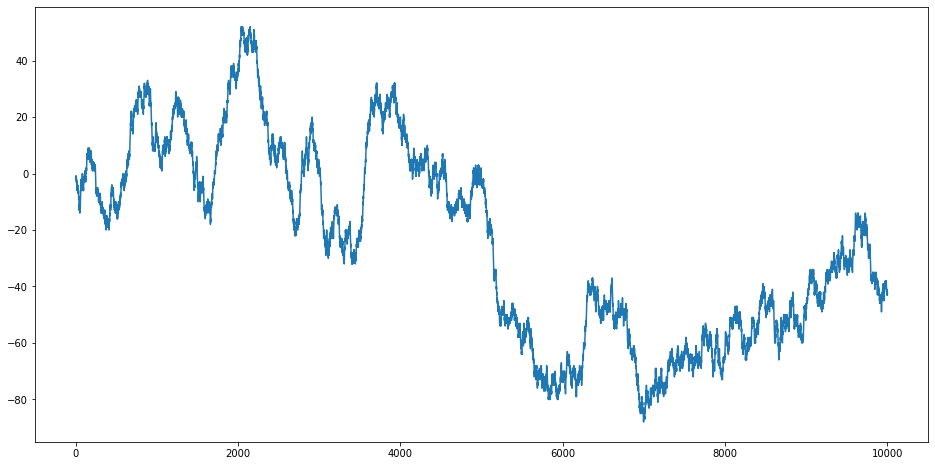

In [ ]:
#@title 
import matplotlib.pyplot as plt 

g = randomWalk()
passeio = [ next(g) for _ in range(10000) ]

plt.figure(figsize=(16,8))
plt.plot(passeio);



---



<font size="+4" color="blue;green"><b>?</b></font> Repita o exercício anterior mas a duas dimensões. Neste caso há quatro passos possíveis, subir ou descer uma unidade no eixo dos xx ou no eixo dos yy.



In [ ]:
import random as rnd

def randomWalk2D():
  pass  # ponham aqui a vossa solução

Eis um exemplo deste passeio após dez mil passos:

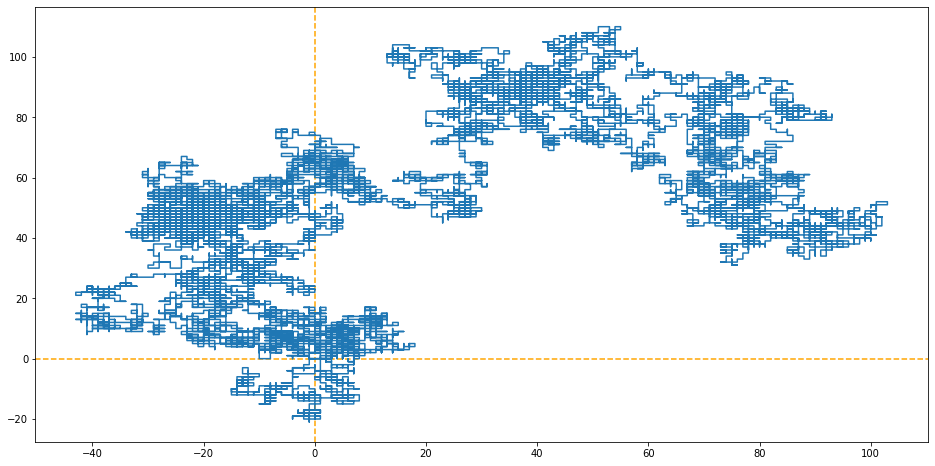

In [ ]:
#@title 
import matplotlib.pyplot as plt 

g = randomWalk2D()
passeio = [ next(g) for _ in range(20000) ]

passeioX = [ passo[0] for passo in passeio ]
passeioY = [ passo[1] for passo in passeio ]

plt.figure(figsize=(16,8))
plt.axvline(0, ls='--', color="orange")
plt.axhline(0, ls='--', color="orange")
plt.plot(passeioX,passeioY);



---



<font size="+4" color="blue;green"><b>?</b></font> Seja o jogo de Poker onde cada jogador recebe inicialmente cinco cartas de um baralho normal (sem Joker).

Crie um gerador que seja capaz de iterar por todas as mãos.



In [15]:
naipes  = [ '♤', '♡', '♢', '♧']
valores = [ str(num) for num in range(2,10)] + ['T', 'J', 'Q', 'K', 'A']   
baralho = [ val+naipe for naipe in naipes for val in valores ]

print(baralho[:13]) # mostrar as primeiras cartas do baralho
#####################

gMaos = gCombinacoes(baralho, 5)

['2♤', '3♤', '4♤', '5♤', '6♤', '7♤', '8♤', '9♤', 'T♤', 'J♤', 'Q♤', 'K♤', 'A♤']




---



<font size="+4" color="blue;green"><b>?</b></font> Defina o predicado `ePoker` que verifica se uma dada mão de cinco cartas é um Poker. 

Qual a probabilidade de sair um Poker quando se recebem as cartas no início do jogo? 

factóide: existem 2598960 mãos diferentes com cinco cartas.

In [16]:
def ePoker(mao):
  valorCartas = [ carta[0] for carta in mao ]
  
  for valor in valorCartas:
    if valorCartas.count(valor) == 4:
      return True
  return False

cnt = 0
tot = 0
for mao in gMaos:
  cnt += int(ePoker(mao))
  tot += 1

print(f'Em {tot} possibilidades {cnt} foram poker. {(cnt*100)/tot}%')

Em 2598960 possibilidades 624 foram poker. 0.024009603841536616%




---



<font size="+4" color="blue;green"><b>?</b></font> Defina o gerador `ciclo` que recebe uma lista e devolve um gerador infinito que repete os elementos da lista dada.

Por exemplo,

       g = ciclo([0,1,2])
       for _ in range(10):
         print(next(g), end=' ')

produz

       0 1 2 0 1 2 0 1 2 0 

In [18]:
def ciclo(lista):
  while True:
    for x in lista:
      yield x

g = ciclo([0,1,2])
for _ in range(10):
  print(next(g), end=' ')     

0 1 2 0 1 2 0 1 2 0 



---



<font size="+4" color="blue;green"><b>?</b></font> Defina o gerador `gerarEnquanto` que recebe um gerador e um predicado, e gera os items do gerador enquanto os itens validarem o predicado.



In [21]:
def gerarEnquanto(gen, p):
  for x in gen:
    if not p(x):
      break
    yield x

def menorQue10000(n):
  return n < 10000

g = gerarEnquanto(factoriais(), menorQue10000)
for val in g:
  print(val, end= " ")      # deve imprimir 1 1 2 6 24 120 720 5040 

1 1 2 6 24 120 720 5040 



---



<font size="+4" color="blue;green"><b>?</b></font> <font size="+4" color="blue;green"><b>?</b></font> Defina o gerador `naoConsecutivos` que dado um inteiro `n` não negativo, gera todas as *strings* binárias de tamanho `n` que não tenham dois ou mais uns consecutivos.

Por exemplo, `naoConsecutivos(4)` deve gerar 

       0000 0001 0010 0100 0101 1000 1001 1010 

In [23]:
def naoConsecutivos(qtd, b='0', sol='0'):
  if qtd == 0:
    yield sol
  else:
    yield from naoConsecutivos(qtd-1, '0', sol+'0')
    if b==0:
      yield from naoConsecutivos(qtd-1, '1', sol+'1')

for x in naoConsecutivos(4):
  print(x, end=' ')

00000 



---



<font size="+4" color="blue;green"><b>?</b></font> <font size="+4" color="blue;green"><b>?</b></font> Defina o gerador `gRacional` capaz de gerar uma sequência infinita de todos os racionais positivos. Ou seja, `gRacional` é um gerador do conjunto $\mathbb{Q}^+$.

Para tal vamos usar este [algoritmo](https://math.stackexchange.com/questions/7643) que cria a sequência $a_1, a_2, a_3, \ldots$

$$
\begin{array}{lcl}
     a_1    &=& 1  \\
     a_{2k} &=&  a_k \\
     a_{2k+1} &=& a_{k}+a_{k+1} \\
\end{array}
$$

O n-ésimo número racional, $g(n)$ é dado pela expressão 

$$\frac{a_n}{a_{n+1}}$$

Assim, os primeiros racionais são dados por

$$
g(1)= a_{1}/a_{1+1} = 1/1 \\
g(2)= a_{2}/a_{2+1} = 1/2 \\
g(3)= a_{3}/a_{3+1} = 2/1 \\
g(4)= a_{4}/a_{4+1} = 1/3 \\
g(5)= a_{5}/a_{5+1} = 3/2 \\ 
g(6)= a_{6}/a_{6+1} = 2/3 \\
g(7)= a_{7}/a_{7+1} = 3/1 
$$

Devolvam as frações como pares (numerador, denominador).

O resultado esperado para as primeiras dez frações:

    >>> g = gRacional()
    >>> sequencia = [next(g) for _ in range(10)]
    [(1, 1), (1, 2), (2, 1), (1, 3), (3, 2), (2, 3), (3, 1), (1, 4), (4, 3), (3, 5)]

In [27]:
def gRacional():
  aas = [1]
  n = 2
  while True:
    aas.append(aas[n//2 - 1])
    if n % 2 != 0:
      aas[-1] += aas[n//2]
    
    yield (aas[-2], aas[-1])
    n += 1

g = gRacional()
for _ in range(10):
  print(next(g))

(1, 1)
(1, 2)
(2, 1)
(1, 3)
(3, 2)
(2, 3)
(3, 1)
(1, 4)
(4, 3)
(3, 5)


Podemos observar visualmente o percurso inicial da sequência ao longo dos números racionais:

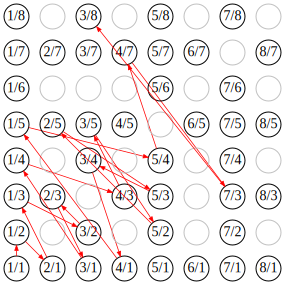

In [ ]:
#@title 
import math
from graphviz import Digraph

styles = {
    'val':  {'shape': 'circle', 'width' : '.35',  'fixedsize' : 'true'},
    'val2': {'shape': 'circle', 'width' : '.35',  'fixedsize' : 'true', 'color' : 'grey'},
}

def drawSequencia(sequencia):
  n = max( [ max(x,y) for (x,y) in sequencia] ) # maior inteiro referido na lista
  g = Digraph(engine="neato")
  fmt    = '{0}/{1}'
  fmtXY  = '{0},{1}!'

  for x in range(1,n+1):               # desenhar nós
    for y in range(1,n+1):
      name  = fmt.format(x,y)
      coord = fmtXY.format(x*0.5,y*0.5)
      if (math.gcd(x,y)==1):
        g.node(name, name, styles['val'], pos=coord)
      else:  # é uma fração que não está na forma reduzida
        g.node(name, '', styles['val2'], pos=coord)

  for i in range(1, len(sequencia)):   # desenhar arcos
    x1,y1 = sequencia[i-1]
    x2,y2 = sequencia[i]
    name1 = fmt.format(x1,y1)
    name2 = fmt.format(x2,y2)
    g.edge(name1, name2, penwidth ='.75', arrowsize='.5', color='red')

  return g

drawSequencia(sequencia)  

Os nós a cinzento correspondem a frações que não estão na forma reduzida, não fazendo assim parte da sequência. Caso contrário estaríamos a gerar frações repetidas.



---



<font size="+4" color="blue;green"><b>?</b></font> <font size="+4" color="blue;green"><b>?</b></font> Existe uma outra contagem que ainda não referimos, os arranjos sem repetições de $n$ elementos em $p$ posições, onde a ordem interessa. O número possível de arranjos totaliza $\frac{n!}{(n-p)!}$. 

Defina a função `arranjos2(xs, p)` que devolve uma lista com todos os arranjos sem repetições.



In [ ]:
def arranjos2(xs, p, pos=0):
  pass  # ponham aqui a vossa solução
